# <font color="Yellow"><b>ST590 Project 1</b></font>
## <font color="Green">Sergio Mora & Vivi Feathers</font>

# <font color="red"><b>Introduction</b></font>
<font color="green">Purples:</font> Predict a value of <i>selling_price</i> for a new motorcycle.

<font color="green">Dataset name:</font> <b>BikeDetails</b> <br>
This dataset contains information about used motorcycles, including their features and selling prices.

<font color="green">Variables used:</font> <i>selling_price</i>, <i>km_driven</i>
<style>
        .tab1 {
            tab-size: 2;
        }
    </style>
<font color="green">Methods:</font><br>
<pre class="tab1">1. Grid search</pre>
<pre class="tab1">2. Gradient descent</pre>
        
<font color="green">Algorithms:</font><br>
<pre class="tab1">1. Using only <i>selling_price</i> to predict c</pre>
<pre class="tab1">2. Using simple linear regression with <i>selling_price</i> and <i>km_driven</i> to predict c</pre>
 
<font color="green">Modules:</font><br>
<pre class="tab1">1. pandas</pre>
<pre class="tab1">2. numpy</pre>
<pre class="tab1">3. matplotlib.pyplot</pre>
<pre class="tab1">4. scipy.stats</pre>

 ## <font color="red">Read in dataset and display the first several rows</font>

In [1]:
### Import modules
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
### Reading the data
bikeDetails = pd.read_csv("bikeDetails.csv")

In [3]:
### Data structure and first several rows
a=bikeDetails.shape
print(a)
bikeDetails.head()

(1061, 7)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


# <font color="red"><b>EDA</b></font>
## <font color="Green"><i>selling_price</i></font>

In [4]:
### General information
bikeDetails["selling_price"].describe(percentiles=[0.25, 0.75])

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64

In [5]:
# Check normality #
import scipy.stats as stat
stat, p = stat.shapiro(bikeDetails["selling_price"])
print(p)
# not normally distributed, use median and IQR #
median_price = bikeDetails["selling_price"].median()
q1_price = bikeDetails["selling_price"].quantile(q = [0.25])
q3_price = bikeDetails["selling_price"].quantile(q = [0.75])
IQR_price = q3_price[0.75] - q1_price[0.25]
print("The meidian of selling_price is", median_price)
print("The first quartile of selling_price is", q1_price)
print("The third quartile of selling_price is", q3_price)
print("The IQR of selling_price is", IQR_price)

2.972154042832937e-42
The meidian of selling_price is 45000.0
The first quartile of selling_price is 0.25    28000.0
Name: selling_price, dtype: float64
The third quartile of selling_price is 0.75    70000.0
Name: selling_price, dtype: float64
The IQR of selling_price is 42000.0


In [34]:
### Median, Q1 and Q3 of selling_price in different seller_type groups
bikeDetails.seller_type = bikeDetails.seller_type.astype("category")
bike_sub = bikeDetails.loc[:,["seller_type","selling_price"]]
price_group_median=bike_sub.groupby("seller_type").median()
print(price_group_median)
price_group_q1=bike_sub.groupby("seller_type").quantile(q = [0.25])
print(price_group_q1)
price_group_q3=bike_sub.groupby("seller_type").quantile(q = [0.25])
print(price_group_q3)

             selling_price
seller_type               
Dealer             44000.0
Individual         45000.0
                  selling_price
seller_type                    
Dealer      0.25        28250.0
Individual  0.25        28000.0
                  selling_price
seller_type                    
Dealer      0.25        28250.0
Individual  0.25        28000.0


## <font color="Green"><i>km_driven</i></font>

In [7]:
### General information
bikeDetails["km_driven"].describe(percentiles=[0.25, 0.75])

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [10]:
# Check normality #
import scipy.stats as stat
stat, p = stat.shapiro(bikeDetails["km_driven"])
print(p)
# not normally distributed, use median and IQR #
median_km = bikeDetails["km_driven"].median()
q1_km = bikeDetails["km_driven"].quantile(q = [0.25])
q3_km = bikeDetails["km_driven"].quantile(q = [0.75])
IQR_km = q3_km[0.75] - q1_km[0.25]
print("The meidian of km_driven is", median_km)
print("The first quartile of km_driven is", q1_km)
print("The third quartile of km_driven is", q3_km)
print("The IQR of km_driven is", IQR_km)

0.0
The meidian of km_driven is 25000.0
The first quartile of km_driven is 0.25    13500.0
Name: km_driven, dtype: float64
The third quartile of km_driven is 0.75    43000.0
Name: km_driven, dtype: float64
The IQR of km_driven is 29500.0


## <font color="red">Correlation between</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

In [15]:
### Correlation Matrix
bikeDetails[["selling_price", "km_driven"]].corr()

,selling_price,km_driven
selling_price,1.000000,-0.212937
km_driven,-0.212937,1.000000


In [18]:
### Pearson correlation
stat.pearsonr(bikeDetails.selling_price, bikeDetails.km_driven)
### the P value is smaller than 0.05, and the correlation coefficient is -0.2129, significate negative correlation.

(-0.2129367071445366, 2.411679611918878e-12)

## <font color="red">Plots of</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

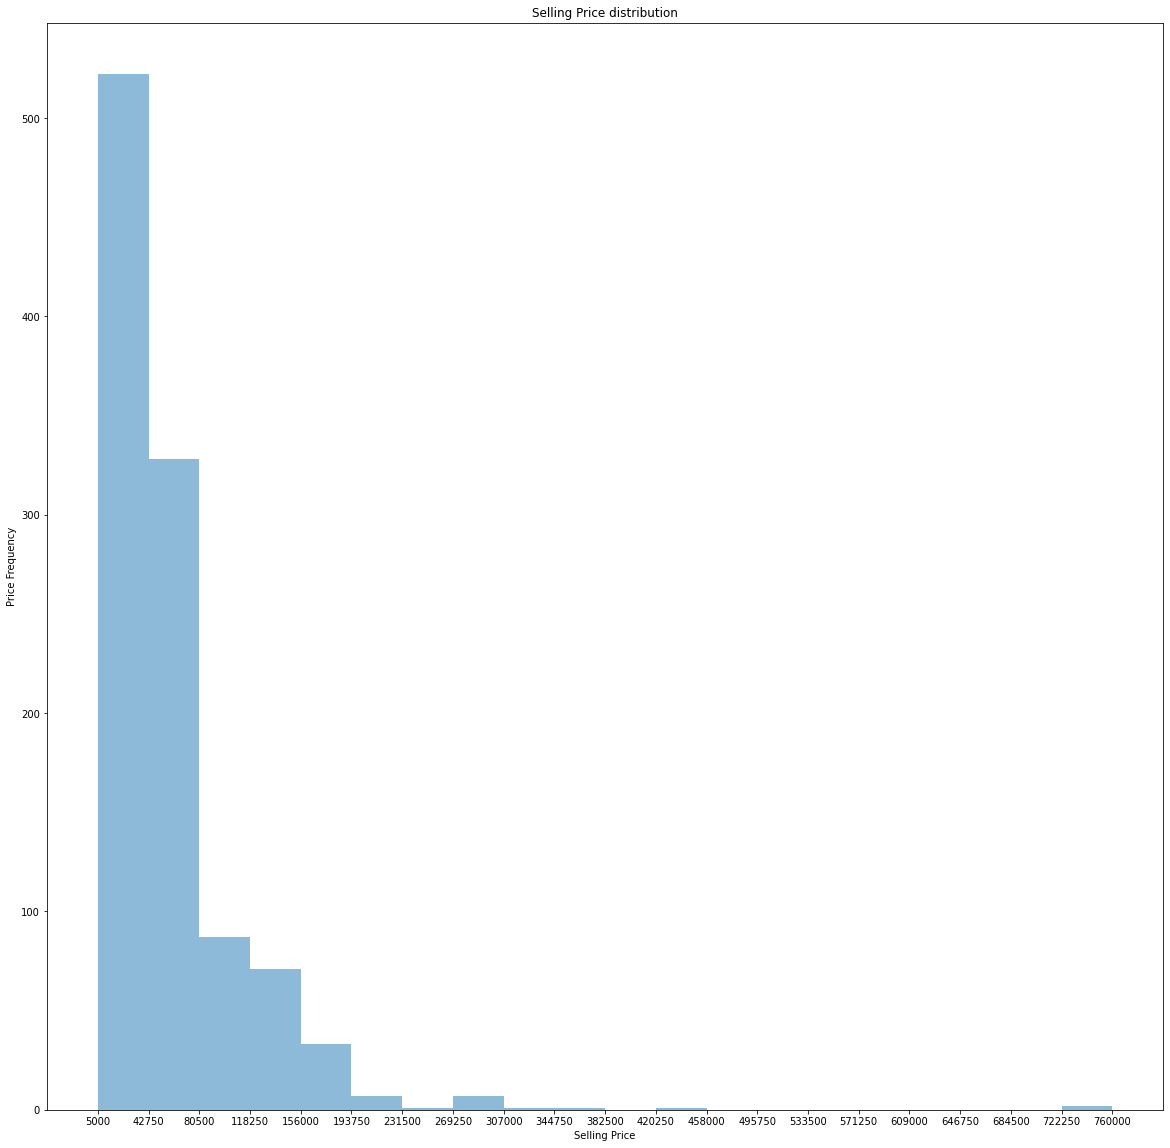

In [29]:
### Histogram for selling_price
fig, ax = plt.subplots(figsize=(20,20))
n, bins, patches=plt.hist(bikeDetails["selling_price"], bins=20, alpha = 0.5)
plt.ylabel("Price Frequency")
plt.xlabel("Selling Price")
plt.xticks(bins)
plt.title("Selling Price distribution")
plt.show()
plt.close()

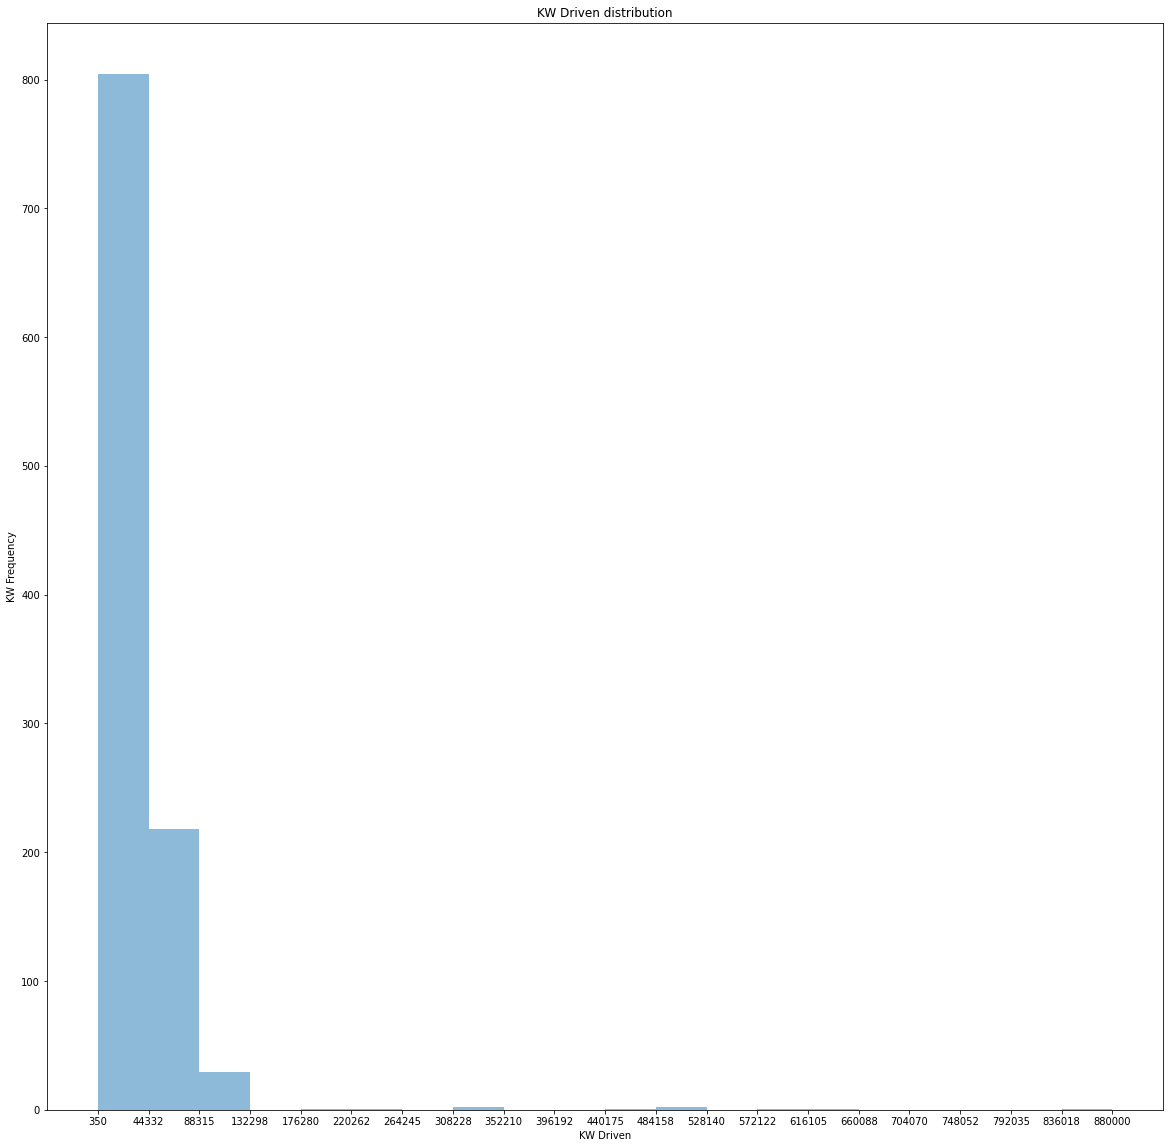

In [31]:
### Histogram for kw_driven
fig, ax = plt.subplots(figsize=(20,20))
n, bins, patches=plt.hist(bikeDetails["km_driven"], bins=20, alpha = 0.5)
plt.ylabel("KW Frequency")
plt.xlabel("KW Driven")
plt.xticks(bins)
plt.title("KW Driven distribution")
plt.show()
plt.close()

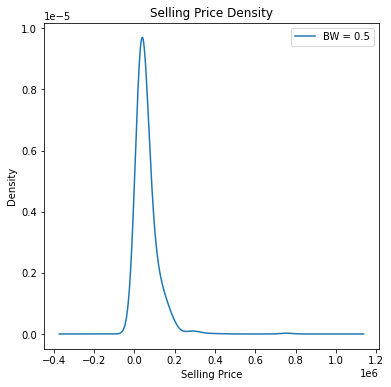

In [11]:
# Kernel density for selling_price #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails["selling_price"].plot.density(bw_method = 0.5, label = "BW = 0.5", ax=ax)
plt.ylabel("Density")
plt.xlabel("Selling Price")
plt.title("Selling Price Density")
plt.legend()
plt.show()
plt.close()

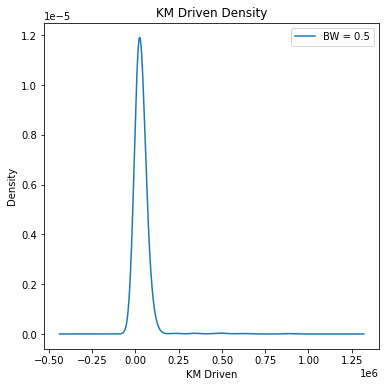

In [12]:
# Kernel density for kw_driven #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails["km_driven"].plot.density(bw_method = 0.5, label = "BW = 0.5", ax=ax)
plt.ylabel("Density")
plt.xlabel("KM Driven")
plt.title("KM Driven Density")
plt.legend()
plt.show()
plt.close()

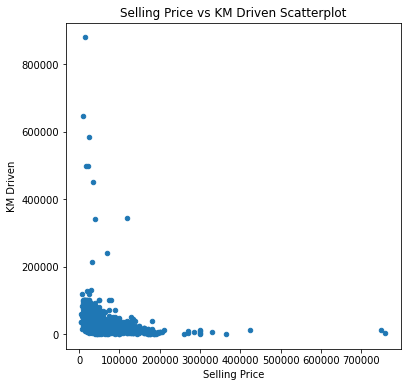

In [14]:
# Selling_price vs KM_Driven Scatterplot #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails.plot.scatter (x= "selling_price", y="km_driven", cmap = "plasma", ax=ax)
plt.xlabel("Selling Price")
plt.ylabel("KM Driven")
plt.title("Selling Price vs KM Driven Scatterplot")
plt.show()
plt.close()

## <font color="red">Contingency Table and Bar Chart of</font> <font color="Green"><i>year</i></font> <font color="red">and</font> <font color="Green"><i>owner</i></font>

In [36]:
### Contingency table
bikeDetails.owner = bikeDetails.owner.astype("category")
bikeDetails.year = bikeDetails.year.astype("category")
bikeDetails.year [0:4]
table = pd.crosstab(bikeDetails.year, bikeDetails.owner)
print(table)

owner  1st owner  2nd owner  3rd owner  4th owner
year                                             
1988           1          0          0          0
1991           1          0          0          0
1993           0          1          0          0
1995           0          0          1          0
1997           2          0          0          0
1998           2          0          1          0
1999           0          1          0          0
2000           4          0          1          1
2001           1          1          0          0
2002           1          2          0          0
2003           1          0          0          0
2004           4          1          0          0
2005          11          3          0          0
2006          17          3          0          0
2007          24          5          0          0
2008          21          5          2          0
2009          21          5          1          1
2010          50         10          0          0


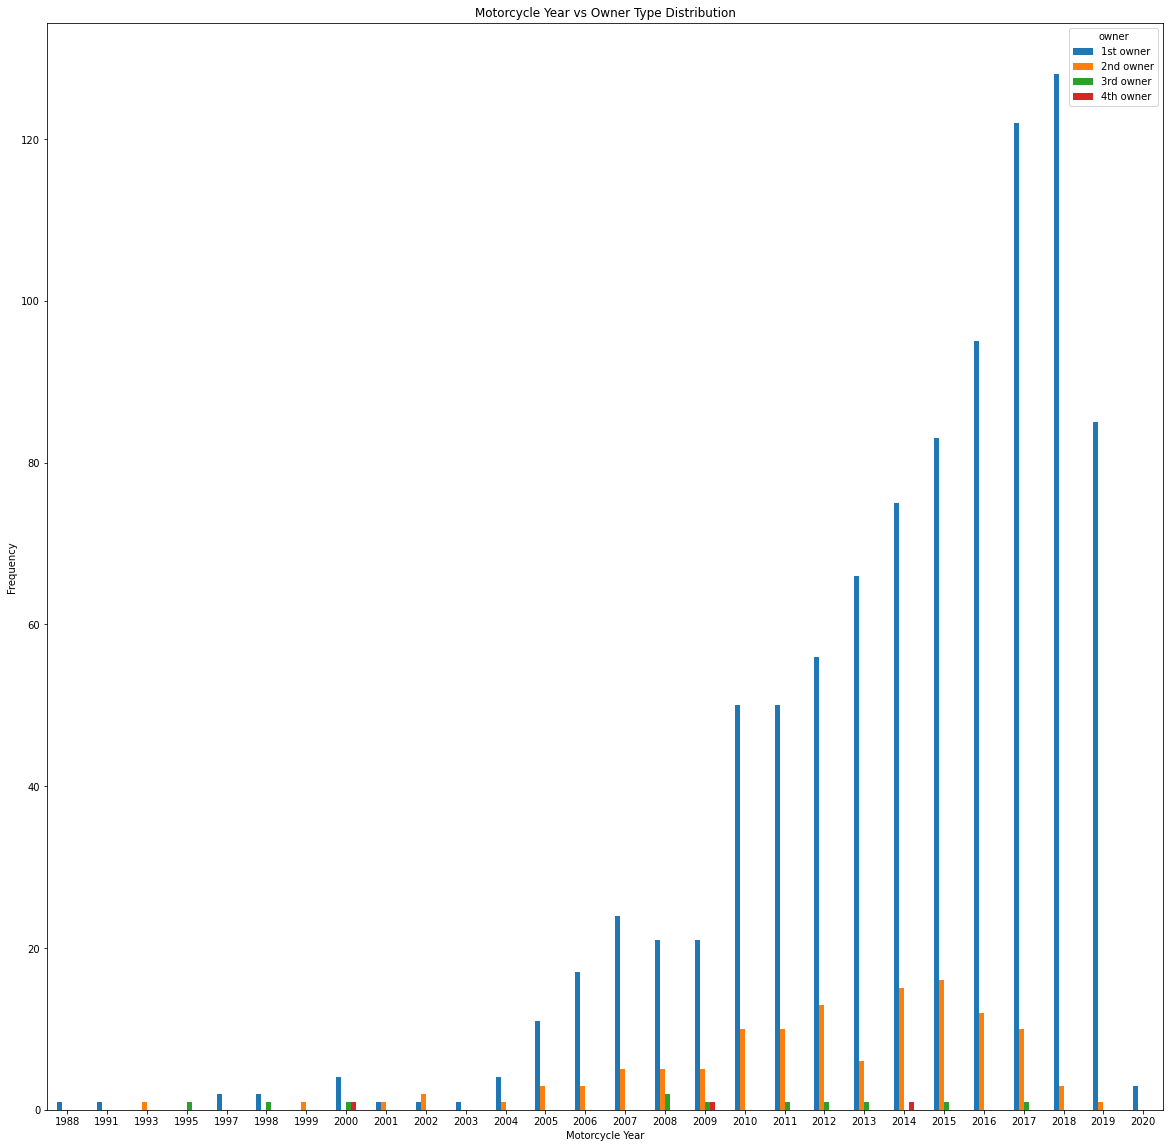

In [39]:
### Bar chart
fig, ax = plt.subplots(figsize=(20,20))
table.plot.bar(ax=ax)
plt.xlabel("Motorcycle Year")
plt.ylabel("Frequency")
plt.title("Motorcycle Year vs Owner Type Distribution")
plt.xticks(rotation = 0)
plt.show()
plt.close()

# Loss Function

  We start of our analysis with a Loss Function which will help us understand the quality of our methods below. This is done by measuring the Root Mean Square Error (RMSE) which indicates how "off" we were in our model. 
  
  RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^n{L(y_i,c)}} - \sqrt{\frac{1}{n}\sum_{i=1}^n{(y_i - c)^2}}$
  
For this equation to work we want to find the value for c that minimizes the RMSE meaning we have the least amount of "Loss" in our equation.

# <font color="Red"><b>Methods One</b></font>
## <font color="Green">Grid Search of using just the y′s</font>

In [5]:
### Find a grid of values using selling_price' mean and standard deviation
grid_y = np.random.normal(59638.151744, 56304.291973, 1000)

In [6]:
### convert grid array to series
grid_y1 = pd.Series(grid_y)
len(grid_y1)

1000

In [3]:
### Creat a RMSE Algorithm
def find_best_c(x, y):
    """
    Calculate RMSE from all the c and append them into a list, find the minimal RMSE and return the corresponding c value
    """
    c_rmse = []
    for i in range(0, len(x)):
        rmse = np.sqrt(sum((y - x[i])**2)/len(y))
        c_rmse.append(rmse)
    min_rmse = min(c_rmse)
    min_loc = c_rmse.index(min_rmse)
    optimal_c = x[min_loc]
    return min_rmse, min_loc, optimal_c

In [100]:
find_best_c(grid_y1, bikeDetails.selling_price)

(56277.811599589, 864, 59556.33124048)

In [101]:
### Verification, change the float in rmse_test equation to the third number returned by "find_best_c" funtion
price_mean = bikeDetails.selling_price.mean()
rmse_test = np.sqrt(sum((bikeDetails.selling_price - 59556.33124048)**2)/len(bikeDetails.selling_price))
print(price_mean, rmse_test)

59638.151743638075 56277.811599589


## <font color="Green">Run the function using km_driven</font>

In [7]:
find_best_c(grid_y1, bikeDetails.km_driven)

(51598.85318787341, 918, 34418.905718851034)

# <font color="Red"><b>Methods Two</b></font>
## <font color="Green">Gradient Descent of using just the y′s</font>

In [89]:
### Creat a Gradient Descent Algorithm
def find_best_c_g(var, step_size, rounds):
    """
    Pick initial c and initial delta, create new c value based on the slop and step size, 
    loop through untill either the absolute difference between new c and cur c are smaller than 50 or reach the maximum iteration 
    """
    cur_c = var.mean() - 5000
    cur_c_rmse = np.sqrt(sum((var - cur_c)**2)/len(var))
    delta_rmse = np.sqrt(sum((var - (cur_c + 0.0001))**2)/len(var))
    slop = (delta_rmse - cur_c_rmse)/0.0001
    c = []
    for i in range(0, rounds):
        new_c = cur_c - slop*step_size
        c.append(new_c)
        c_length = len(c) ###see how many iteration
        if abs(new_c - cur_c) >= 0.0875:
            new_c_rmse = np.sqrt(sum((var - new_c)**2)/len(var))
            cur_c_rmse = np.sqrt(sum((var - cur_c)**2)/len(var))
            delta = new_c - cur_c
            slop = (new_c_rmse - cur_c_rmse)/delta
            cur_c = new_c
        else:
            cur_c = new_c
            break
    return cur_c, c_length

In [90]:
find_best_c_g(bikeDetails.selling_price, 1, 1000)

(54695.08588311897, 647)

## <font color="Green">Run the function using km_driven</font>

In [91]:
find_best_c_g(bikeDetails.km_driven, 1, 1000)

(29455.368739167945, 1000)